# Persistence Diagrams

TDA pipeline for creating a persistence diagram from a dataset:

Dataset  →  Filtered Simplicial Complex  →  Persistence Module  →  Persistence Diagram

The first step is accomplished by, for example, assigning a sequence of Vietoris-Rips complexes to point cloud data.
The second step involves computing the  𝑘 th homology vector space of each Vietoris-Rips complex.
Finally, the last step follows from the interval decomposition we get from the Fundamental Theorem of Persistent Homology.
In this notebook, we will go over the second step and will look at a few examples of persistence diagrams generated from toy datasets.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from sklearn.metrics import pairwise_distances

import gudhi as gd

If you recieve the following error:

Module Not Found Error: No module named 'gudhi

you need to install gudhi package. To do so run the following cell.

In [2]:
pip install gudhi

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Example 1: A 2-Dimensional Datasets

Let's look at a dataset consisting of a pair of circles in the plane. We can parameterize our example by including a variable radius and offset parameter. One circle will always be radius 1, centered at the origin. The other circle will be variable. We can also include variable noise terms.

In [3]:
def create_circle_data(radius, x_offset, noise1 = 0.5, noise2 = 0.5, num_points1 = 50, num_points2 = 50):
    
    A = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = num_points1)
    A = A.T/np.linalg.norm(A,axis = 1)
    A = A.T + noise1*np.random.rand(num_points1,2)

    B = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = num_points2)
    B = radius*B.T/np.linalg.norm(B,axis = 1)
    B = B.T + noise2*np.random.rand(num_points2,2) + [x_offset,0]

    X = np.concatenate((A,B))
    
    return X

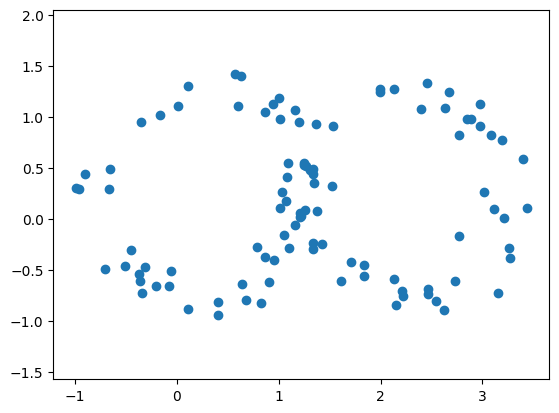

In [4]:
X = create_circle_data(1,2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

Lets compute the distance matrix of our data:

[[0.         1.36498955 0.51796936 ... 0.98131744 1.38815115 0.85242815]
 [1.36498955 0.         0.93698731 ... 0.43714943 1.94254673 1.46765125]
 [0.51796936 0.93698731 0.         ... 0.50993955 1.23459165 0.66851839]
 ...
 [0.98131744 0.43714943 0.50993955 ... 0.         1.5449903  1.04170448]
 [1.38815115 1.94254673 1.23459165 ... 1.5449903  0.         0.57179244]
 [0.85242815 1.46765125 0.66851839 ... 1.04170448 0.57179244 0.        ]]


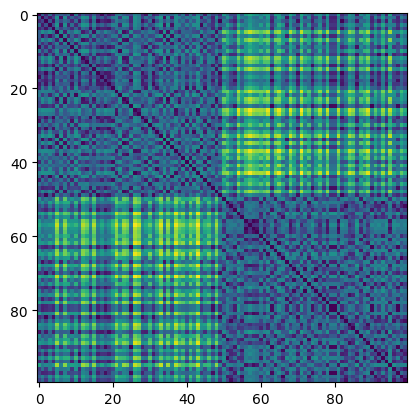

In [5]:
 D = pairwise_distances(X)
print(D)
plt.imshow(D)
plt.show()

The following function will take a point cloud and produce either barcodes or persistence diagrams (note that the input is a point cloud and we dont hvae to computes the distance matrix).

In [12]:
def visualize_persistent_homology(X, style = 'barcodes', max_dimension = 2):

    """
    In: X is a Euclidean point cloud of size [num_points,dimension]
        style = 'barcodes' or 'diagrams'
        max_dimension = highest dimensional skeleton of the VR complex to compute. Highest degree
        persistent homology will be one less than this.
    Out: plots either persistence barcodes or persistence diagrams
    """
    
    D = pairwise_distances(X)
    skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 10) 
    Rips_complex = skeleton.create_simplex_tree(max_dimension = max_dimension)
    BarCodes = Rips_complex.persistence()

    if style == 'barcodes':
        for dim in range(max_dimension):
            print('Dimension',dim)
            plt.figure()
            gd.plot_persistence_barcode([bar for bar in BarCodes if bar[0] == dim])
            plt.show()
    elif style == 'diagrams':
        plt.figure()
        gd.plot_persistence_diagram(BarCodes)
        plt.show()
            
    return

If we dont specify the parameter 'style', then it automatically produces persistence barcode. Lets try it:

In [13]:
visualize_persistent_homology(X)

Dimension 0


<Figure size 640x480 with 0 Axes>

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/texmf-dist/fonts/tfm/public/cm/cmr12.tfm'

<Figure size 640x480 with 1 Axes>

Dimension 1


<Figure size 640x480 with 0 Axes>

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/texmf-dist/fonts/tfm/public/cm/cmr12.tfm'

<Figure size 640x480 with 1 Axes>

The first figure is the collection of bars coresponded to 0-deminsional features (connected components) and the second figure is the collection of bars coresponded to 1-deminsional features (1-dim holes). To have both 0-dim and 1-dim holes in one figure we can plot the persistence diagram. To do so we should change the style to 'diagram':

In [8]:
visualize_persistent_homology(X, style = 'diagrams')

<Figure size 640x480 with 0 Axes>

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/texmf-dist/fonts/tfm/public/cm/cmr10.tfm'

<Figure size 640x480 with 1 Axes>

## Question:  
how do you interpret this diagram?

# Example 2:
Now we can try this on different point clouds and see if the results make sense.

In [9]:
# Pick parameters:
radius = 2
x_offset = 8
noise1 = 1
noise2 = 1
num_points1 = 50
num_points2 = 50

X = create_circle_data(radius,x_offset,noise1 = noise1, noise2 = noise2, num_points1 = num_points1, num_points2 = num_points2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

visualize_persistent_homology(X)

visualize_persistent_homology(X, style = 'diagrams')

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/texmf-dist/fonts/tfm/public/cm/cmr10.tfm'

<Figure size 640x480 with 1 Axes>

Dimension 0


<Figure size 640x480 with 0 Axes>

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/texmf-dist/fonts/tfm/public/cm/cmr12.tfm'

<Figure size 640x480 with 1 Axes>

Dimension 1


<Figure size 640x480 with 0 Axes>

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/texmf-dist/fonts/tfm/public/cm/cmr12.tfm'

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/texmf-dist/fonts/tfm/public/cm/cmr10.tfm'

<Figure size 640x480 with 1 Axes>

## Example 3 (3D-Datasets)

Next we can look at some simple 3-dimensional point clouds. We'll start with a sphere.

In [10]:
# Define a function to sample randomly from a sphere
def sample_spherical(npoints, ndim=3):
    sample = np.random.randn(ndim, npoints)
    sample /= np.linalg.norm(sample, axis=0)
    sample = sample.T
    return sample

# Randomly sample from a sphere with added noise
def noisy_sample_spherical(npoints, ndim, noise_level = 0.01):
    sphere = sample_spherical(npoints, ndim)
    noise = np.random.multivariate_normal(ndim*[0], noise_level*np.eye(ndim), npoints)
    sample = sphere + noise
    return sample

In [11]:
data = noisy_sample_spherical(200,3,noise_level = .001)
# Generate the noisy circle.

# Plot the data as a scatter plot.
fig = plt.figure(figsize = (8,8))
ax = fig.gca(projection='3d', adjustable='box')
ax.scatter(data[:,0],data[:,1],data[:,2], c='b', marker='o');

TypeError: gca() got an unexpected keyword argument 'projection'

<Figure size 800x800 with 0 Axes>

If you recieced AttributeError: 'Figure' object has no attribute 'gcd', replace fig.gcd by 'fig.add_subplot'

For this example, we'd like to look at higher dimensional homology. Unfortunately, `gudhi` is a bit slow for computing higher dimensional persistent homology (I believe that it has some ways to sparsify simplicial complexes, which may make it faster). You can try running the function we created above, but it will take quite a while to run.

In [ ]:
# visualize_persistent_homology(data, max_dimension=3)

We can instead use `ripser` packages which is optimized specifically to handle Vietoris-Rips persistent homology on point clouds. If you dont have ripser, you can install it with pip:


In [ ]:
pip install ripser


We also need the `persim` package which includes some visualization tools, plus some functions for vectorizing persistence diagrams that we will discuss later, you can install it using pip ( see `scikit-tda` package for more information: https://scikit-tda.org/index.html.)

In [ ]:
pip install persim

In [ ]:
from ripser import ripser
from persim import plot_diagrams 

`ripser` allows you to use your point cloud and you dont hvae to compute the pairwise distances between points (distance matrix). Moreover, it does the job a lot more quickly, but is still not super fast if we compute higher dimensional persistent homology on large point clouds. You can experiment with parameters here to see how far you can push this.

In [ ]:
%%time
dgms = ripser(data, maxdim=2)['dgms']
fig = plt.figure(figsize=(6,6))
plot_diagrams(dgms, show=True)

The following point cloud lies on the surface of a donut in 3-dimensional space (called a *torus*).

In [ ]:
N = 50
r = 5
R = 10

theta = 2*np.pi*np.random.rand(N)
phi = 2*np.pi*np.random.rand(N)
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta) 
Z = r *  np.sin(phi)
pointCloud = np.append(X.reshape(N,1),Y.reshape(N,1),axis =1)
pointCloud = np.append(pointCloud,Z.reshape(N,1), axis = 1)


fig = plt.figure(figsize = (6,6))
ax = fig.gca(projection='3d', adjustable='box')
ax.scatter(pointCloud[:,0],pointCloud[:,1],pointCloud[:,2], c='b', marker='o');

In [ ]:
%%time
dgms = ripser(pointCloud, maxdim=2)['dgms']
fig = plt.figure(figsize=(6,6))
plot_diagrams(dgms, show=True)

When sampling a torus, we need to sample fairly densely to get a strong topological signal.